## Install requirements

In [ ]:
try:
    import contextily as cx
except ImportError:
    !pip install contextily
    import contextily as cx

try:
    from pyproj import  Transformer
except ImportError:
    !pip install pyproj
    from pyproj import  Transformer

## Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import rasterio
import matplotlib.pyplot as plt

%matplotlib inline

## Helper functions

In [2]:
# Coordinate transformation function
# Transforms from World Geodetic System [deg] to Web Mercator [m]
lonlat_to_webmercator = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

def mytransform(lon, lat):
    x, y = lonlat_to_webmercator.transform(lon, lat)
    return x, y

# Bounding box computation
def bbox_compute(lon, lat, factor=0.05):
    # factor = percentage of the delta lat or long to use as padding
    mlon = min(lon)
    Mlon = max(lon)
    mlat = min(lat)
    Mlat = max(lat)
    dlon = Mlon - mlon
    dlat = Mlat - mlat
    
    # Compute bounds
    north = Mlat + (dlat*factor)
    south = mlat - (dlat*factor)
    east = Mlon + (dlon*factor)
    west = mlon - (dlon*factor)
    
    return north, south, east, west

## Process input data

In [3]:
# Read GPS data
df=pd.read_csv('https://raw.githubusercontent.com/GGn0/python-examples/main/gps_plotting/gpsdata.csv')

gps_lon = df['Longitude[deg]']
gps_lat = df['Latitude[deg]']

# Compute web mercator projection
pr_lon = []
pr_lat = []

for lon, lat in zip(gps_lon, gps_lat):
    xp, yp = mytransform(lon, lat)
    pr_lon += [xp]
    pr_lat += [yp]

# Compute bounding box
n, s, e, w = bbox_compute(gps_lon, gps_lat)

## Display results

In [4]:
# # Optionally save the image for later use
# _ = cx.bounds2raster(w,
#                  s,
#                  e,
#                  n,
#                  ll=True,
#                  path="./map.tif",
#                  source=cx.providers.OpenStreetMap.CH
# )

# # Or get the image data in a variable
# _img, _ext = cx.bounds2img(w,
#                            s,
#                            e,
#                            n,
#                            ll=True,
#                            source=cx.providers.OpenStreetMap.CH
#                           )

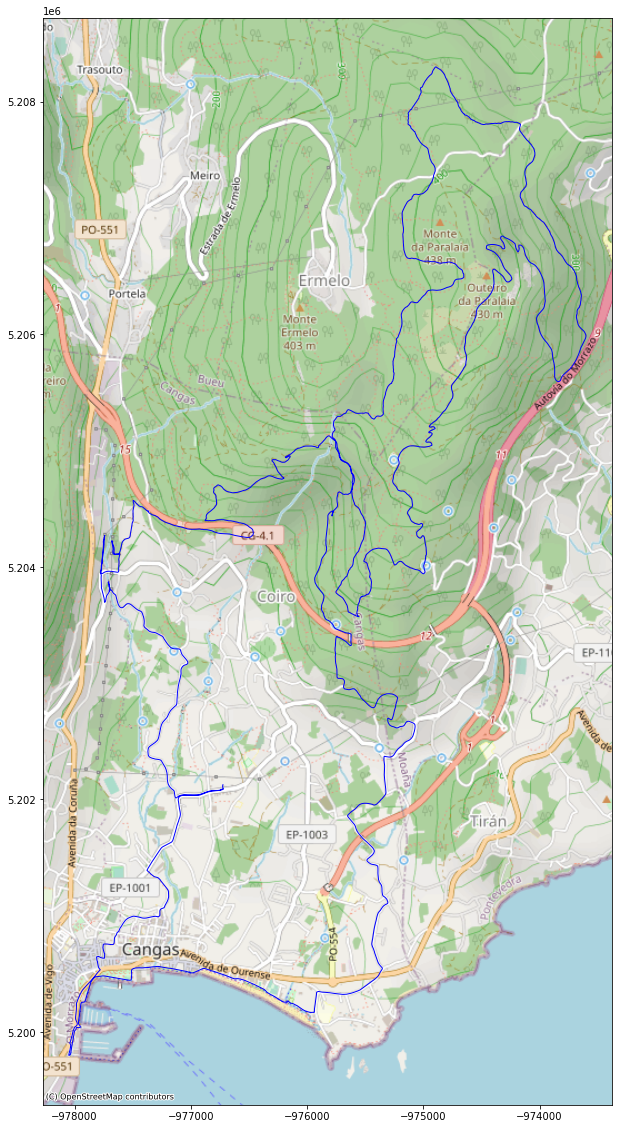

In [5]:

# Create a figure with an axis
f, ax = plt.subplots(1, figsize=(20, 20))
# Add the gps track
ax.plot(pr_lon, pr_lat, 'b', linewidth=1)
# Add the map image below
# ax.imshow(_img, zorder = 0, extent = _ext)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.CH)
plt.show()